## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

**Answer:** 290584

d. The proportion of users converted.

In [5]:
#find total users
df_users=df.query('converted')
df_users.count()

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

In [6]:
#calculate users converted
df_converts=df.query('converted==1')
df_converts.count()
df.count()

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

In [7]:
#calculate the proportion of users converted
df_converts.count()/df_users.count()

user_id         0.119659
timestamp       0.119659
group           0.119659
landing_page    0.119659
converted       0.119659
dtype: float64

12% of users converted

e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
# find number of times new_page is matched to control
df_misalign=df.query('group=="control" and landing_page=="new_page"')
df_misalign.nunique()

user_id         1928
timestamp       1928
group              1
landing_page       1
converted          2
dtype: int64

In [9]:
# find number of times old_page is matched to treatment
df_misalign2=df.query('group=="treatment" and landing_page=="old_page"')
df_misalign2.nunique()

user_id         1965
timestamp       1965
group              1
landing_page       1
converted          2
dtype: int64

In [10]:
# get the total
df_misalign.nunique() + df_misalign2.nunique()

user_id         3893
timestamp       3893
group              2
landing_page       2
converted          4
dtype: int64

3893 instances where new_page and treatment don't add up

f. Do any of the rows have missing values?

In [11]:
# check for null values, but could also have used df.info()
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

No rows have null values

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
# using the syntax from the next line of code:
df2=df.copy()
df2 = df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == True]

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

There are 29084 unique IDs

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**answer:** 773912

c. What is the row information for the repeat **user_id**? 

**answer:** row 2893 is a duplicate of row 1899

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2.drop_duplicates(subset='user_id',keep='first', inplace=True)
df2[df2.user_id==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
df2.query('converted==1').count()/df2.nunique()

user_id             0.119597
timestamp           0.119597
group           17376.500000
landing_page    17376.500000
converted       17376.500000
dtype: float64

**answer:** 0.1196 probability of converting regardless of page they receive

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
(df2.query('group=="control"')['converted']==1).mean()

0.1203863045004612

**answer:** 0.1204 probability of converting when in the control group

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
(df2.query('group=="treatment"')['converted']==1).mean()

0.11880806551510564

**answer:** 0.1188 probability individual in treatment group converted

d. What is the probability that an individual received the new page?

In [20]:
df2.query('landing_page=="new_page"').count()/df2.nunique()

user_id             0.500062
timestamp           0.500062
group           72655.000000
landing_page    72655.000000
converted       72655.000000
dtype: float64

**answer:** 0.5001 probability individual received new page

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**answer:** No. The probability of converting whether one was one a new page or an old page are very similar 0.12 when rounding to two decimal points. Similarly we can see that your likelihood of getting a new page versus an old page was  very, very close: 0.5001 for a new page and (1-0.5001) for an old page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null hypothesis:** **$p_{old}$** >= **$p_{new}$**, or **$p_{new}$** - **$p_{old}$** <= 0
    
**Alternate hypothesis:** **$p_{new}$** > **$p_{old}$** or **$p_{new}$** - **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
p_new=df2.query('converted==1').shape[0]/df2.shape[0]
p_new

0.11959708724499628

**Answer:** 0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old=df2.query('converted==1').shape[0]/df2.shape[0]
p_old

0.11959708724499628

**Answer:** 0.11959708724499628

c. What is $n_{new}$?

In [23]:
n_new=df2.query('landing_page=="new_page"').shape[0]
n_new

145310

**Answer:** 147239

d. What is $n_{old}$?

In [24]:
n_old=df2.query('landing_page=="old_page"').shape[0]
n_old

145274

**Answer:** 147239

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted=np.random.choice([0,1], size=n_new, p=[p_new,(1-p_new)])
new_page_converted.mean()

0.8806207418622256

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted=np.random.choice([0,1], size=n_old, p=[p_old, (1-p_old)])
old_page_converted.mean()

0.8806531106736236

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
sim_diff=new_page_converted.mean()-old_page_converted.mean()
sim_diff

-3.236881139800918e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
diffs=[]
for _ in range(10000):
    new_page_converted=np.random.choice([0,1], size=n_new,replace=True, p=[p_new,(1-p_new)]).mean()
    old_page_converted=np.random.choice([0,1], size=n_old, replace=True, p=[p_old,(1-p_old)]).mean()
    diffs.append(new_page_converted-old_page_converted)
p_diffs=np.array(diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

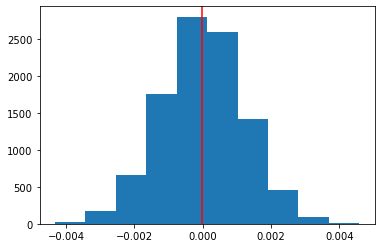

In [29]:
plt.hist(p_diffs);
plt.axvline(sim_diff, color='r'); 

**Answer:** Yes, the plot looks like a normal distribution

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

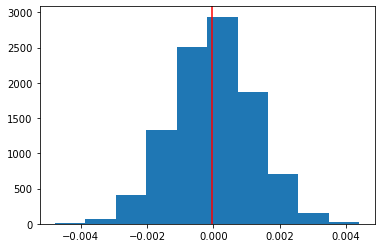

In [30]:
#If the null was true, the difference between New and Old would be less than or equal to 0.
# Plotting to see what the std deviation of the sampling distribution would look like if it came from the null
null_vals=np.random.normal(0,np.std(p_diffs),10000)
plt.hist(null_vals);
plt.axvline(sim_diff,color='r');

Our sample (sim_diff) falls close to the center of the distribution and we would therefore expect that that null is more likely to be true

In [31]:
act_old=df2.query('group=="control"').converted.mean()
act_new=df2.query('group=="treatment"').converted.mean()
act_diff=act_new-act_old
(p_diffs>act_diff).mean()

0.904

**Answer:** 90% of simulated differences are greater than observed differences. 

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:** This is the p value - the probability of observing the statistic if the null hypothesis is true. As the figure is large, it suggests we shouldn't move away from the null. (2) if we look at the graph above, we can see that sim_diff is very close to the mean and falls close to the distribution. (3) We need to have a p-value of <=5% to reject the null. 0.9008 is higher than 0.05 which suggests we must stay with the null

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = df2.query('group=="control"and converted==1')['converted'].count()
convert_new = df2.query('group=="treatment"and converted==1')['converted'].count()
n_old = n_old
n_new = n_new

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
z_score, p_value= sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:** The z-score tells us how many standard deviations from the population mean a point is; here 1.3 standard deviations higher than the average. The percentile on a normal distribution for a z-score of 1.3 is ± 91 (see listed reference for table.) i.e. 91% of data falls beneath this point; far to the right. The p-value of 0.905 is consistent with findings for j. and k. above - the p.value is large and therefore we shouldn't move away from the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** Logistic regression as there are only two possible outcomes - conversion or no conversion

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [37]:
df2['intercept']=1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [42]:
log_mod=sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results=log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2020-07-28 15:22 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:**
The p-value for the ab-page is 0.1899. Although it is small, it is not less than 5% (0.1899>0.05) which means that we need to stay with the null and not move to the alternative.(Crudely put, that the new page shapes conversion.)

In part II alternative hypothesis: **$p_{new}$** - **$p_{old}$** > 0, In part III alternative hypothesis is that the landing page (x-value) influences the conversion rate (y-value) either positively or negatively -  **$p_{new}$** - **$p_{old}$** =! 0. Part II we are looking at a one-tailed test and Part III we are looking at a two-tailed test.

In both cases the results suggest we shouldn't move away from the null.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:** there are a number of factors that might influence conversion. These include the length of time of the trial, the number of participants, the consistency of test subjects in the two groups (are they descriptively similar?), the novelty effect (conversion is driven by the novelty of the new page) and conversely change aversion (stay with the old because it is familiar.) One solution might be to add more variables to see if there are other factors that explain conversion rather than simply new page/old page. As such, its a good idea, but we need to be mindful that the model will incrrease in complexity.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [55]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [58]:
### Create the necessary dummy variables
df_new['intercept'] = 1
df_new[['US', 'UK','CA']] = pd.get_dummies(df_new['country'])

lm=sm.Logit(df_new['converted'],df_new[['intercept','US','UK','ab_page']])
results=lm.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2020-07-28 16:57 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
US           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
==================================================================

"""

**Answer:** No, country doesn't appear to have an impact on conversion. The p-values for the US and the UK are both greater than an error margin of 0.05 which would suggest that we should not reject the null hypothesis that there is a relationship between country and page

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [61]:
### Fit Your Linear Model And Obtain the Results
df_new.groupby(['country','ab_page']).mean()

converted  intercept  US  UK  CA
country ab_page                                  
CA      0         0.118783        1.0   1   0   0
        1         0.111902        1.0   1   0   0
UK      0         0.120022        1.0   0   1   0
        1         0.121171        1.0   0   1   0
US      0         0.120630        1.0   0   0   1
        1         0.118466        1.0   0   0   1

In [64]:
# now looking at conversion rates of the UK and the US (we're going to drop CA as baseline)
df_new['UK_conv']=df_new.UK*df_new.ab_page
df_new['US_conv']=df_new.US*df_new.ab_page
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA,UK_conv,US_conv
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [66]:
lm_1=sm.Logit(df_new['converted'],df_new[['intercept','US_conv','UK_conv','ab_page','UK','US']])
results=lm_1.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2020-07-28 17:51 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
US_conv      -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
UK_conv       0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
US           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
==================================================================

"""

**Answer:** As per the answer to the previous question, the page and country interactions are outside the margin of error of 0.05 and therefore we must stay with the null/fail to reject the null - we can't conclude page and country interactions have a bearing on conversion rates. 

Based on a composite of the different angles of investigation in this assignment, it would appear that we should stay with the null under the various tested hypotheses - the new page doesn't appear to be influencing the conversion rate. That said, there may be merit in understanding (a) whether there are other factors at play shaping the outcomes, (b) introducing other variables (if data is available), (c) extending the time period of the trial, (d) randomizing the timing of the trial, (e) understanding if there was any differentiation in who the respondents were are some - but not exclusive - considerations. This is of course  if time and budget allowed for these considerations... which in the real world they probably don't :)

### References
I referenced the following:
1. to identify specific duplicates: https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python
2. Z-scores and percentiles: https://www.pindling.org/Math/Learning/Basic_Math/Examples/supplimentary/Appendix_G_z_score/z_scores.htm


<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.